# Importing libraries

In [1]:
# import tensorflow as tf
import numpy as np
import pandas as pd
import json
import nltk
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.layers import Input, Embedding, Dense, GlobalMaxPooling1D,Flatten
from tensorflow.keras.layers import LSTM
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt

# Importing the dataset

In [2]:
content = open('chatbt.json')
data1 = json.load(content)

# getting all the data to lists

In [3]:
tags = []
inputs = []
responses = {}
for intent in data1['intents']:
    responses[intent['tag']]=intent['responses']
    for lines in intent['input']:
        inputs.append(lines)
        tags.append(intent['tag'])

# converting to dataframe

In [4]:
data = pd.DataFrame({"input":inputs,"tag":tags})

# printing the data

In [5]:
data

,input,tag
0,Hello,greeting
1,hi,greeting
2,whats up,greeting
3,what is your name?,whatiName
4,who are you?,whatiName
...,...,...
162,How have advances in medicine and therapy chan...,
163,Can you explain how developments in medicine a...,
164,I'd like to learn more about the ways in which...,
165,Tell me about the changes in the lives of indi...,


# removing punctuations

In [6]:
import string
data['input'] = data['input'].apply(lambda wrd:[ltrs.lower() for ltrs in wrd if ltrs not in string.punctuation])
data['input'] = data['input'].apply(lambda wrd: ''.join(wrd))
data

,input,tag
0,hello,greeting
1,hi,greeting
2,whats up,greeting
3,what is your name,whatiName
4,who are you,whatiName
...,...,...
162,how have advances in medicine and therapy chan...,
163,can you explain how developments in medicine a...,
164,id like to learn more about the ways in which ...,
165,tell me about the changes in the lives of indi...,


# tokenize the data

In [7]:
from tensorflow.keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer(num_words=2000)
tokenizer.fit_on_texts(data['input'])
train = tokenizer.texts_to_sequences(data['input'])
#apply padding
from tensorflow.keras.preprocessing.sequence import pad_sequences
x_train = pad_sequences(train)

#encoding the outputs
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train = le.fit_transform(data['tag'])

In [8]:
input_shape = x_train.shape[1]
print(input_shape)

26


# define vocabulary

In [9]:
vocabulary = len(tokenizer.word_index)
print("number of unique words : ",vocabulary)
output_length = le.classes_.shape[0]
print("output length: ",output_length)

number of unique words :  422
output length:  32


In [10]:
def get_model():
    #creating the model
    i = Input(shape=(input_shape,))
    x = Embedding(vocabulary+1,10)(i)
    x = LSTM(10,return_sequences=True)(x)
    x = Flatten()(x)
    x = Dense(output_length,activation="softmax")(x)
    model = Model(i,x)
    return model

In [11]:
model = get_model()

# compiling the model

In [12]:
model.compile(loss="sparse_categorical_crossentropy",optimizer='adam',metrics=['accuracy'])

# training the model

In [13]:
train = model.fit(x_train,y_train,epochs=200)

Epoch 1/200
6/6 [==============================] - 3s 15ms/step - loss: 3.4658 - accuracy: 0.0359
Epoch 2/200
6/6 [==============================] - 0s 16ms/step - loss: 3.4592 - accuracy: 0.0958
Epoch 3/200
6/6 [==============================] - 0s 11ms/step - loss: 3.4530 - accuracy: 0.0958
Epoch 4/200
6/6 [==============================] - 0s 14ms/step - loss: 3.4464 - accuracy: 0.0898
Epoch 5/200
6/6 [==============================] - 0s 14ms/step - loss: 3.4387 - accuracy: 0.0898
Epoch 6/200
6/6 [==============================] - 0s 12ms/step - loss: 3.4285 - accuracy: 0.0898
Epoch 7/200
6/6 [==============================] - 0s 11ms/step - loss: 3.4172 - accuracy: 0.0898
Epoch 8/200
6/6 [==============================] - 0s 15ms/step - loss: 3.4013 - accuracy: 0.0898
Epoch 9/200
6/6 [==============================] - 0s 21ms/step - loss: 3.3816 - accuracy: 0.0898
Epoch 10/200
6/6 [==============================] - 0s 15ms/step - loss: 3.3594 - accuracy: 0.0898
Epoch 11/200
6/6 [=

# plotting model accuracy

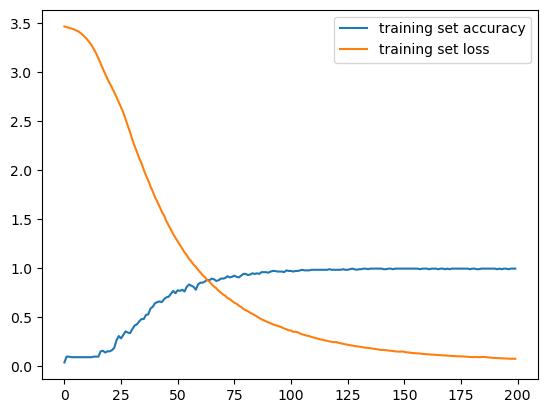

In [14]:
plt.plot(train.history['accuracy'],label='training set accuracy')
plt.plot(train.history['loss'],label='training set loss')
plt.legend()

# Saving model

In [15]:
model.save("downcyndrome_chatbot.h5")

C:\Users\asus\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


# Testing Model

In [3]:
# Testing Model
# chatting
import random
from tensorflow import keras


#Loading model
reconstructed_model = keras.models.load_model("downcyndrome_chatbot.h5")


while True:
    texts_p = []
    prediction_input = input('You : ')
    
    #removing punctuation and converting to lowercase
    prediction_input = [letters.lower() for letters in prediction_input if letters not in string.punctuation]
    prediction_input = ''.join(prediction_input)
    texts_p.append(prediction_input)
    
    #tokenizing and padding
    prediction_input = tokenizer.texts_to_sequences(texts_p)
    prediction_input = np.array(prediction_input).reshape(-1)
    prediction_input = pad_sequences([prediction_input],input_shape)
    
    #getting output from model
    output = reconstructed_model.predict(prediction_input)
    output = output.argmax()
    
    #finding the right tag and predicting
    response_tag = le.inverse_transform([output])[0]
    print("ChatBot :",random.choice(responses[response_tag]))
    if response_tag == "goodbye":
        break

    

NameError: name 'tokenizer' is not defined